# Customer Credit Score Classification Using K-Nearest Neighbors

## **About Dataset**
### [Problem Statement](https://www.kaggle.com/datasets/parisrohan/credit-score-classification)
> **Our current credit scoring systems often limit access to fair credit, especially for people with non-traditional income sources or limited credit histories. As a community, we aim to create an inclusive, transparent, and fair credit scoring model that reduces bias, considers diverse financial backgrounds, and opens doors to responsible credit for all. This will promote economic mobility and set a new standard for equitable lending practices.**

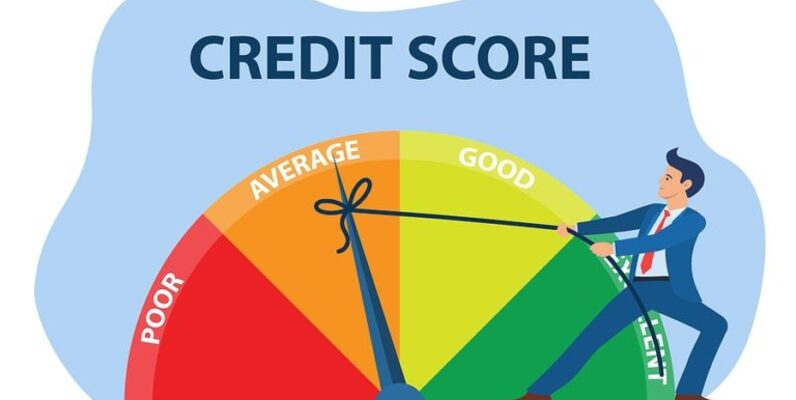
---

### **Task**
**Given a person’s credit-related information, build a machine learning model that can classify the credit score.**

* **ID**                     : Represents a unique identification of an entry  
* **Customer_ID**           : Represents a unique identification of a person  
* **Month**                 : Represents the month of the year  
* **Name**                  : Represents the name of a person  
* **Age**                   : Represents the age of the person  
* **SSN**                   : Represents the social security number of a person  
* **Occupation**            : Represents the occupation of the person  
* **Annual_Income**         : Represents the annual income of the person  
* **Monthly_Inhand_Salary** : Represents the monthly base salary of a person  
* **Num_Bank_Accounts**     : Represents the number of bank accounts a person holds  
* **Num_Credit_Card**      : Represents the number of credit cards held by a person  
* **Interest_Rate**         : Represents the interest rate applicable to loans or credit lines associated with the person  
* **Num_of_Loan**          : Represents the total number of loans that the person has taken  
* **Type_of_Loan**         : Represents the type of loans the person has (e.g., home loan, personal loan, car loan, etc.)  
* **Delay_from_due_date**  : Represents the number of days a payment is delayed from its due date  
* **Num_of_Delayed_Payment**: Represents the total number of times the person has made a delayed payment  
* **Changed_Credit_Limit**  : Represents whether the person's credit limit has changed (typically a binary indicator: yes/no or 1/0)  
* **Num_Credit_Inquiries**   : Represents the number of times a person's credit report has been accessed by lenders, usually as part of the loan application process  
* **Credit_Mix**            : Represents the variety of credit accounts a person has (e.g., revolving credit, installment loans, etc.)  
* **Outstanding_Debt**      : Represents the total amount of debt that is currently outstanding for the person  
* **Credit_Utilization_Ratio**: Represents the ratio of the person’s current credit card balances to their credit limits, typically expressed as a percentage  
* **Credit_History_Age**     : Represents the length of time the person has had credit accounts, which can impact their credit score  
* **Payment_of_Min_Amount**  : Represents whether the person consistently pays only the minimum amount due on their credit accounts (typically a binary indicator: yes/no or 1/0)  
* **Total_EMI_per_month**    : Represents the total amount the person pays each month towards equated monthly installments (EMIs) for loans  
* **Amount_invested_monthly**: Represents the amount of money a person invests each month in various investment options  
* **Payment_Behaviour**       : Represents the overall payment behavior of the person, which could indicate whether they are timely, late, or have a history of defaults  
* **Monthly_Balance**         : Represents the average monthly balance maintained in the person’s bank account(s)  
* **Credit_Score**            : Represents the credit score of the person, which summarizes their creditworthiness based on their credit history and current financial situation  


## Credit score Data Modeling Information

* [About Dataset](#about-dataset)
* [Task](#task)
* [Credit score Data Modeling Information](#credit-score-data-modeling-information)
* [Importing the libraries](#importing-the-libraries)
* [Reading the Dataset](#reading)
* [Exploring the Dataset](#exploring-the-dataset)
* [Grid and Layout Adjustments](#grid-and-layout-adjustments)
* [Preparing the Data](#preparing-the-data)
* [Data Splitting](#data-splitting)
* [K-NearestNeighbors Classifier](#k-nearestneighbors-classifier)
* [Simple Linear Regression](#simple-Linear-Regression)
* [Multiple Linear Regression](#multiple-Linear-Regression)
* [Logistic Regression](#logistic-Regression)
* [Naive Bayes](#naive-Bayes)
* [Support Vector Machine](#support-Vector-Machine)
* [Random Forest](#random-forest)
* [Decision Tree Classifier](#decision-tree-classifier)
* [Comparison between Classifier Models](#comparison-between-classifier-models)

## Importing the libraries

In [1]:
import os
import textwrap
import kagglehub
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')


/Users/gabcsx/env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
parisrohan_credit_score_classification_path = kagglehub.dataset_download('parisrohan/credit-score-classification')

print('Data source import complete.')

Data source import complete.


## Reading the Dataset <a id="reading"></a>

In [3]:
dataset_path = parisrohan_credit_score_classification_path

train_data_path = os.path.join(dataset_path, 'train.csv')
test_data_path = os.path.join(dataset_path, 'test.csv')

train = pd.read_csv(train_data_path)
test= pd.read_csv(test_data_path)

## Exploring the Dataset

In [4]:
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [5]:
test.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [7]:
# Summarizes the train dataset with styled formatting for readability.
train.describe().T.style.background_gradient(cmap='Blues').set_properties(**{'font-family':'Segoe UI'})

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.000000,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.000000,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.000000,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.000000,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.000000,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.000000,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.000000,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.000000,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [8]:
train['Credit_Score'].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

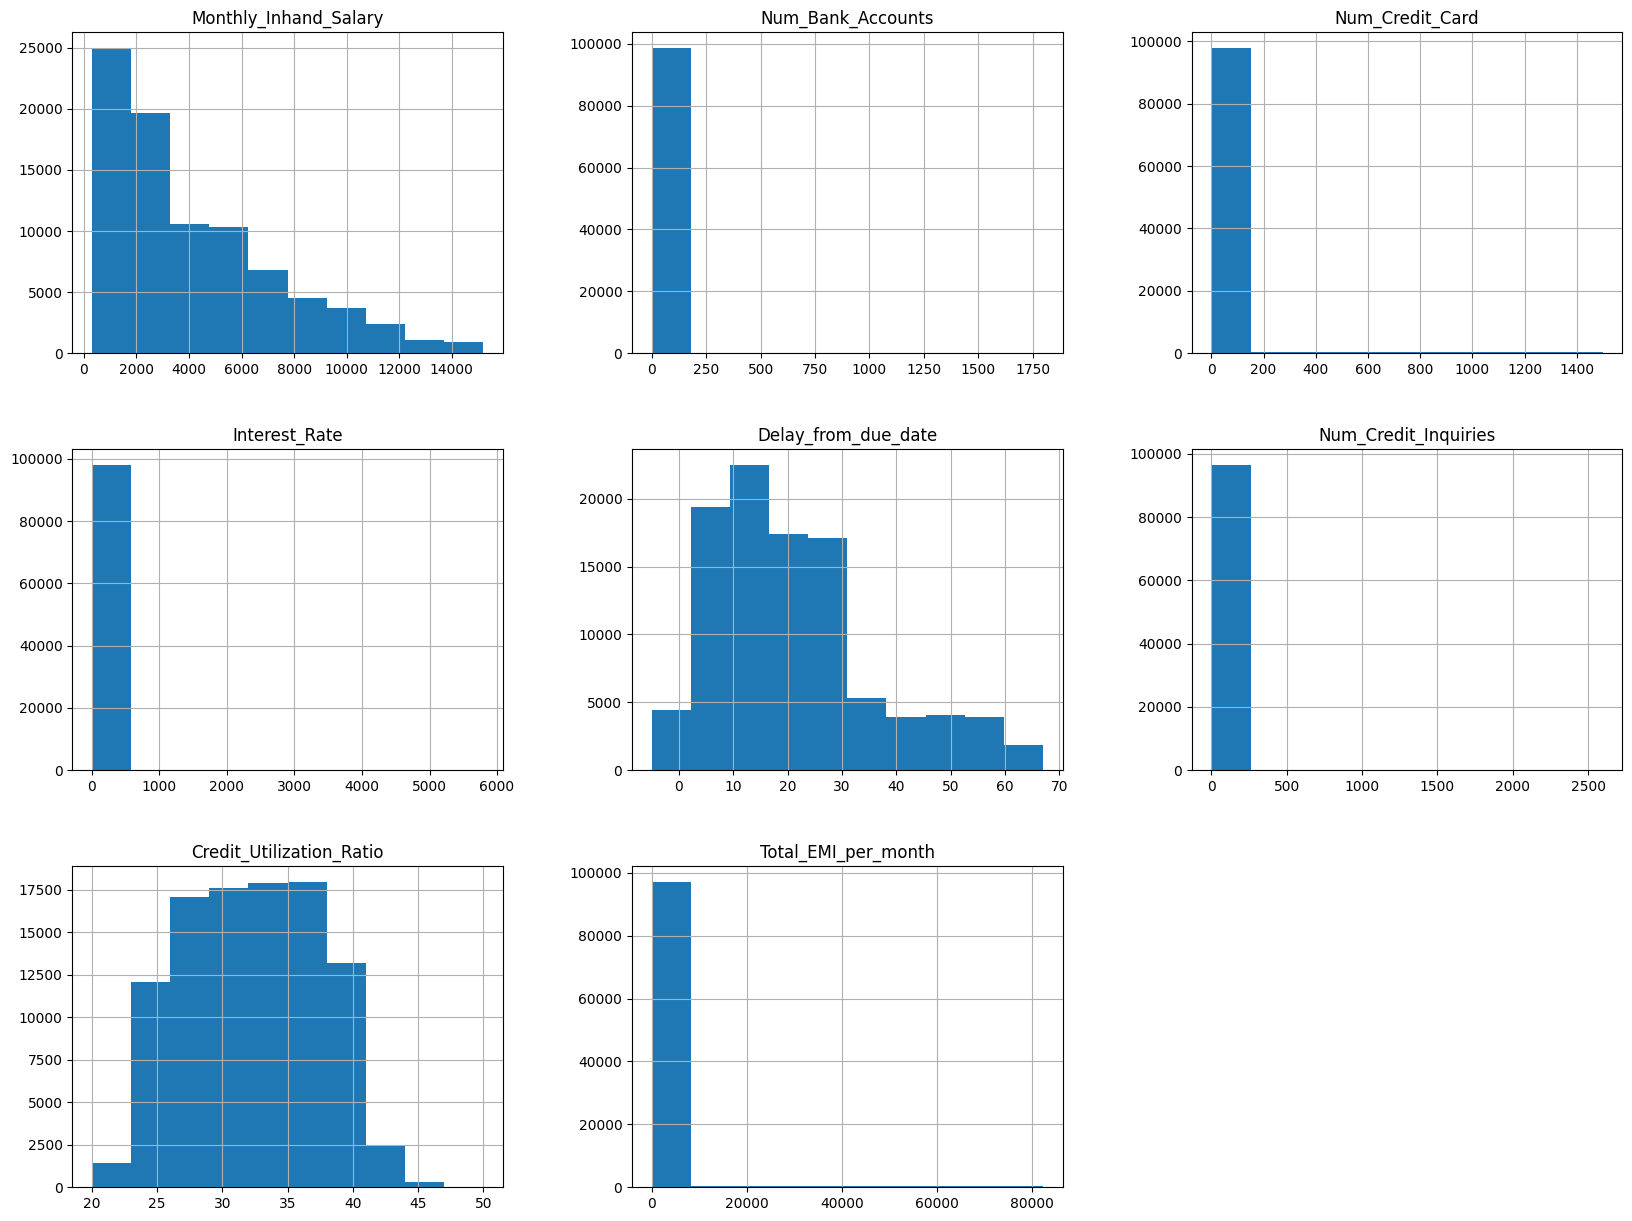

In [9]:
train.hist(figsize=(20, 15))
plt.show()

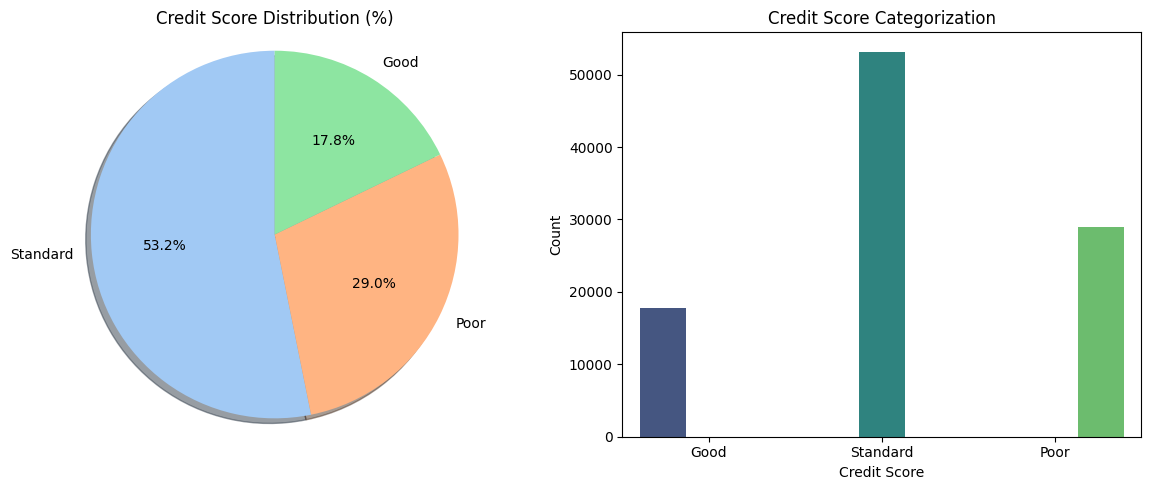

In [10]:
# Set the figure size
plt.figure(figsize=(12, 5))

# Pie chart for Credit Score distribution
plt.subplot(1, 2, 1)
credit_score_counts = train['Credit_Score'].value_counts()
labels = credit_score_counts.index
sizes = credit_score_counts.values
colors = sns.color_palette("pastel", len(labels))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors)
plt.title('Credit Score Distribution (%)')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular

# Bar chart for Credit Score categorization
plt.subplot(1, 2, 2)
sns.countplot(x='Credit_Score', data=train, palette='viridis', hue='Credit_Score', dodge=True)
plt.title('Credit Score Categorization')
plt.xlabel('Credit Score')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [11]:
train.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [12]:
train.shape

(100000, 28)

In [13]:
train.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [14]:
missing_values = train.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

if not missing_values.empty:
    print("Columns with missing values:")
    print(missing_values)
else:
    print("No missing values found in the dataset.")

Columns with missing values:
Monthly_Inhand_Salary      15002
Type_of_Loan               11408
Name                        9985
Credit_History_Age          9030
Num_of_Delayed_Payment      7002
Amount_invested_monthly     4479
Num_Credit_Inquiries        1965
Monthly_Balance             1200
dtype: int64


## Grid and Layout Adjustments

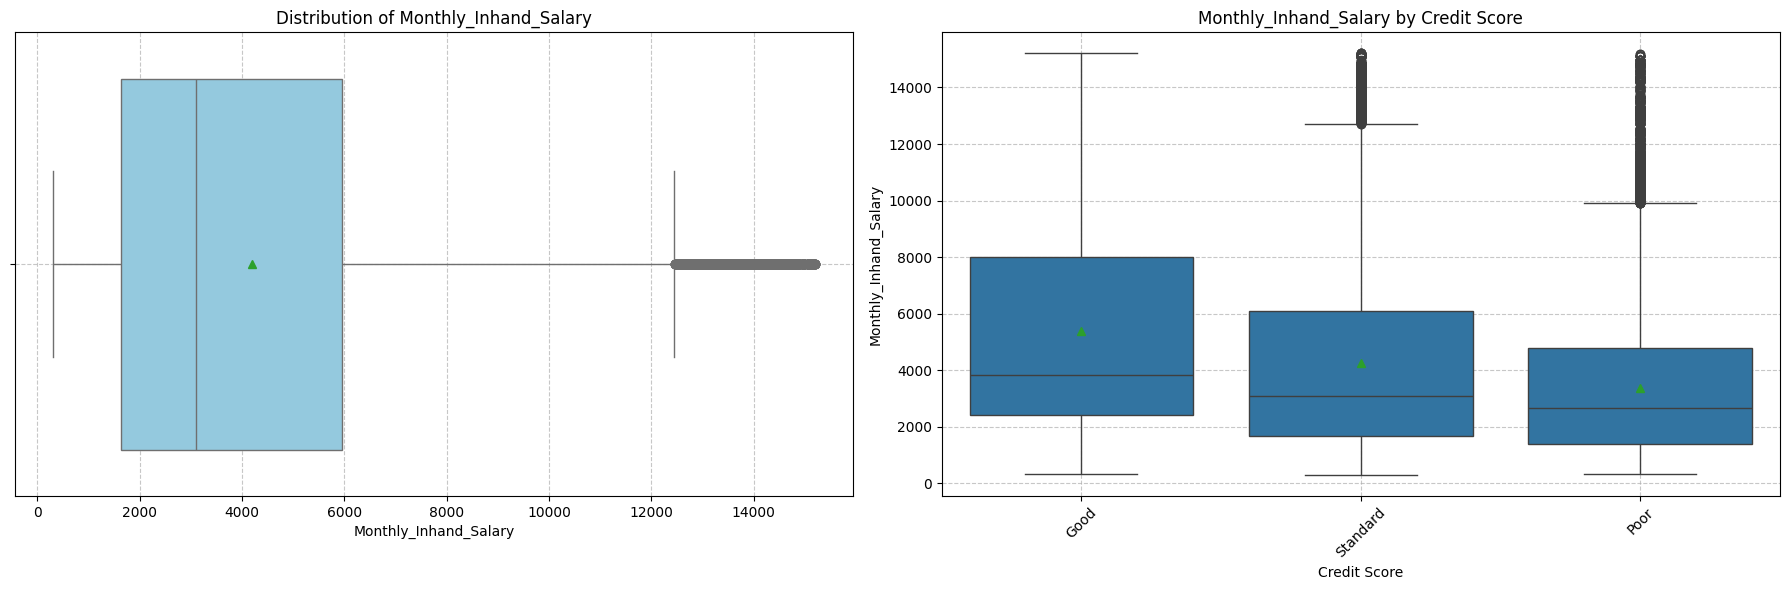

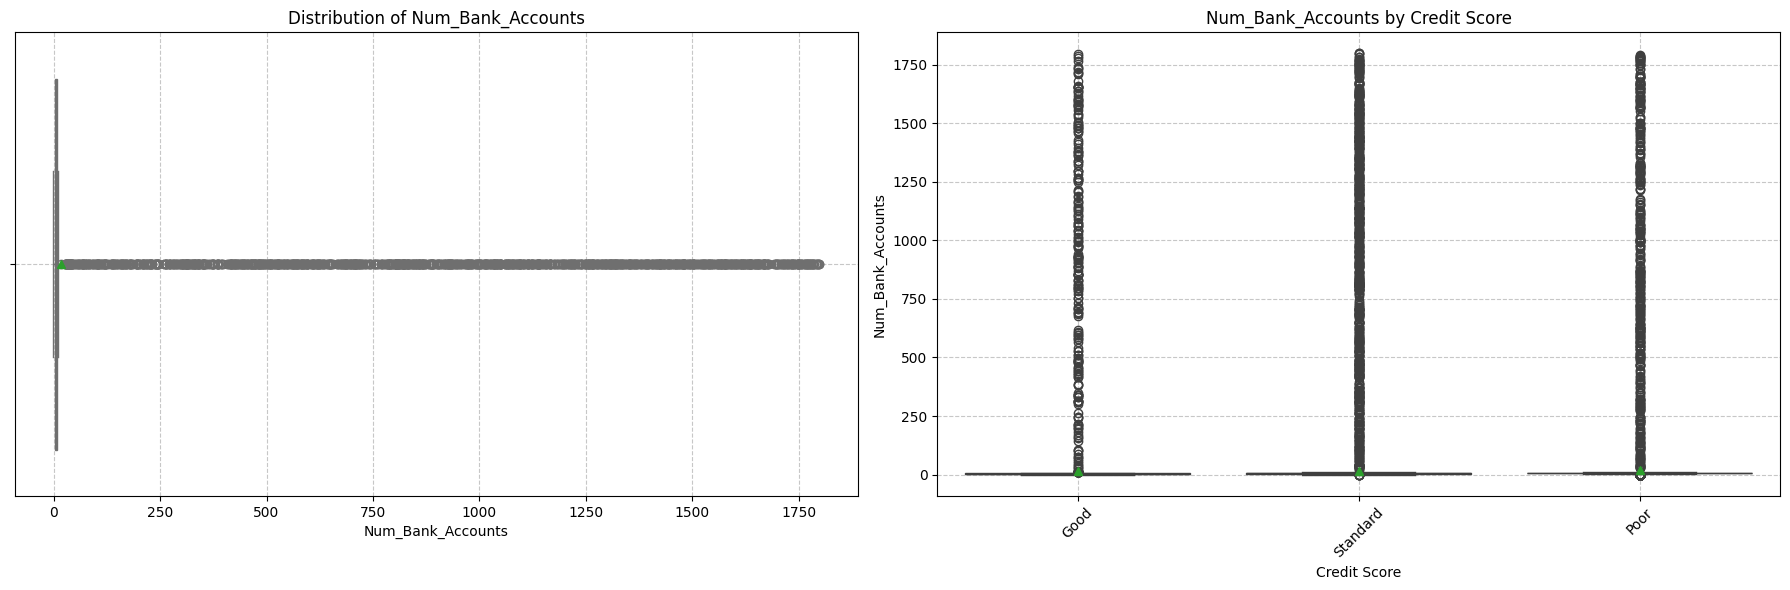

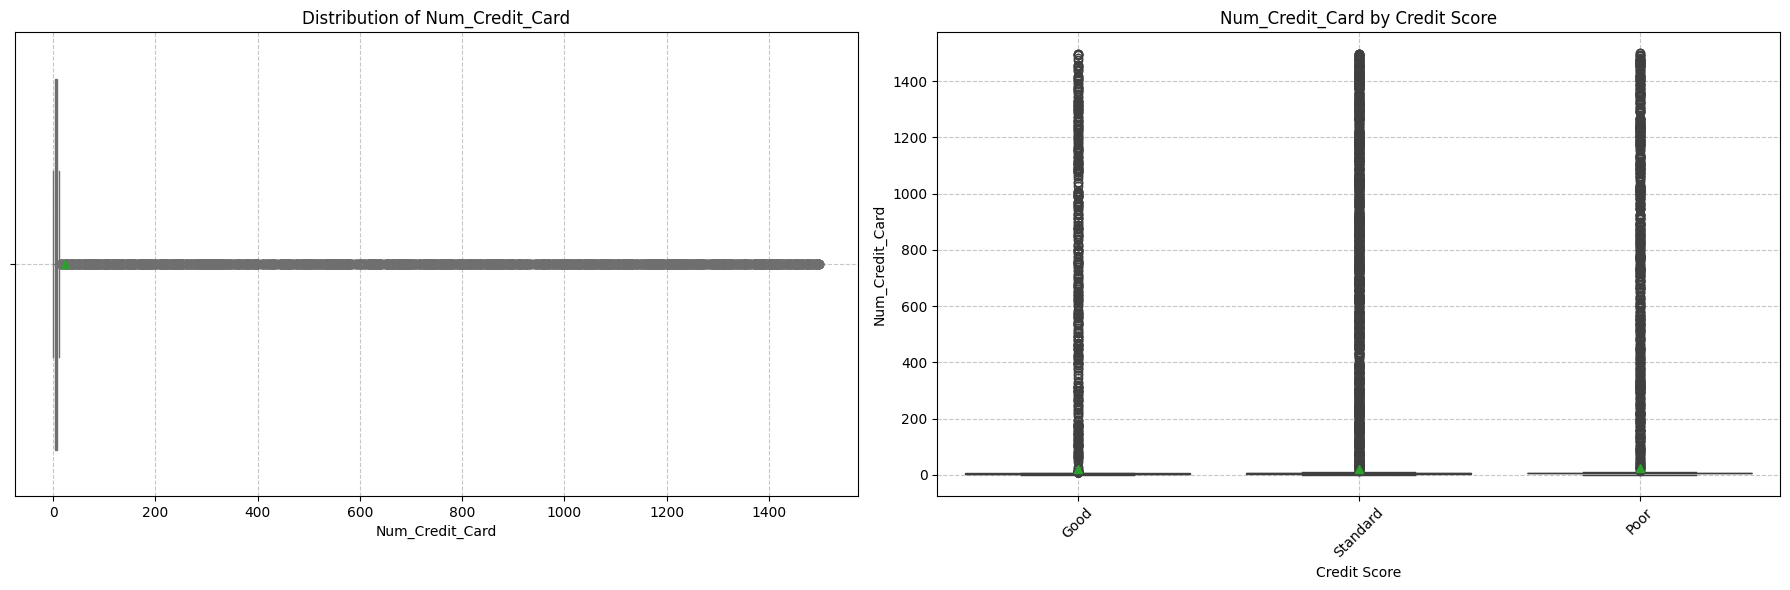

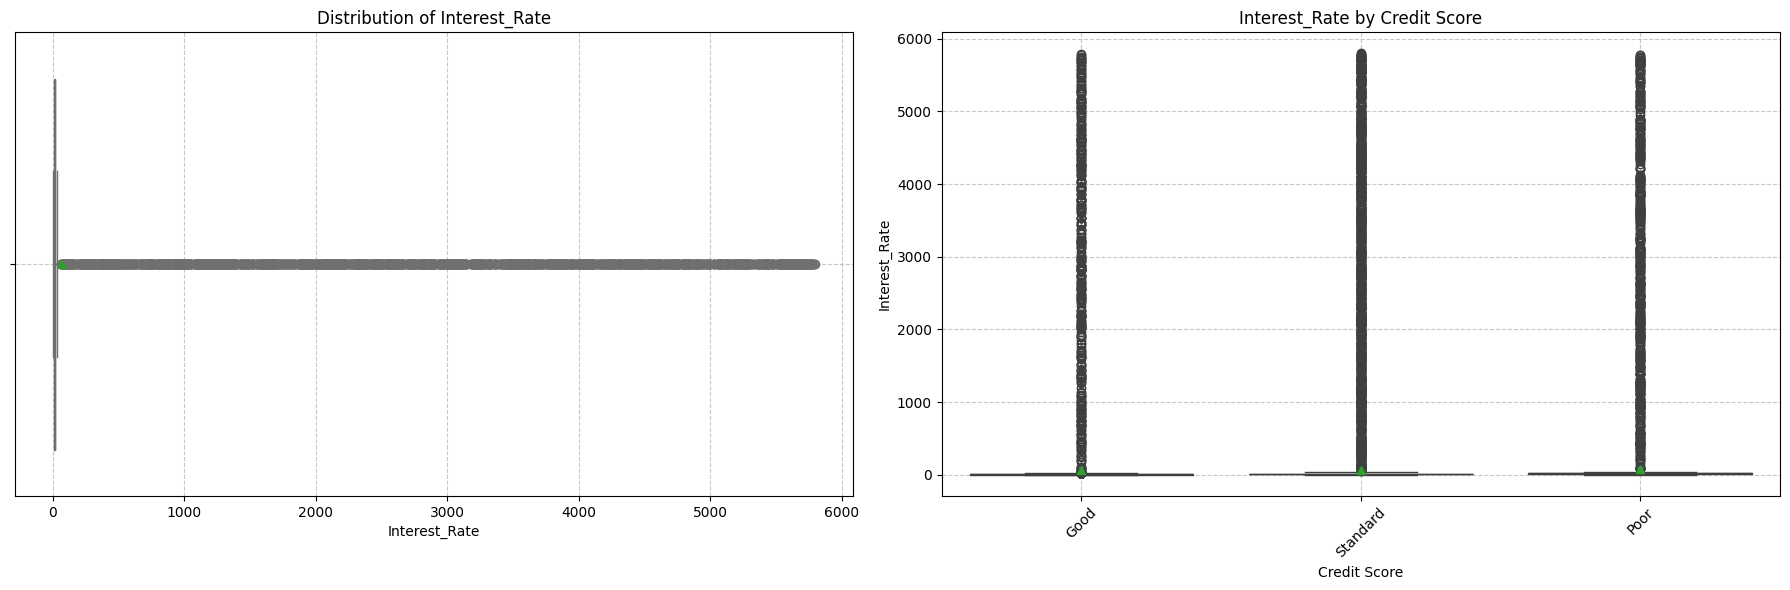

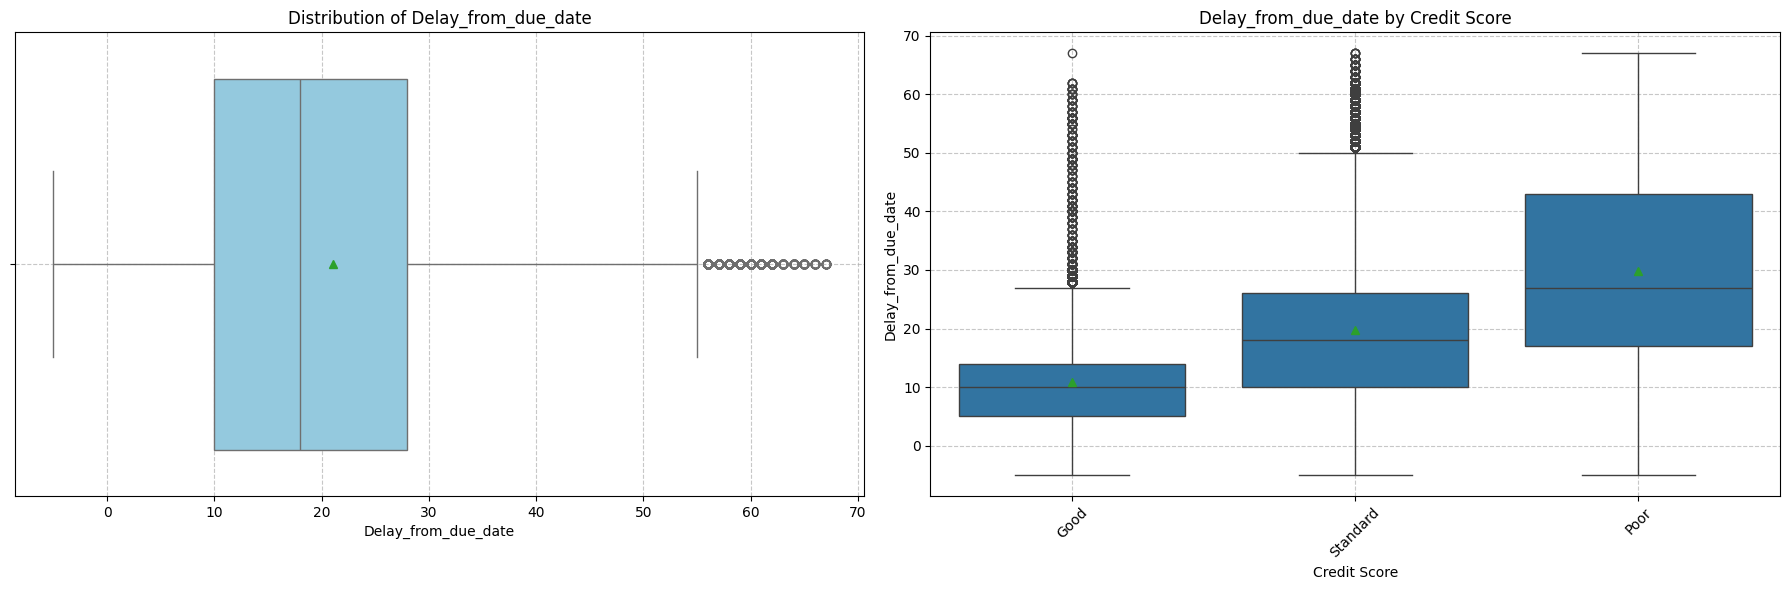

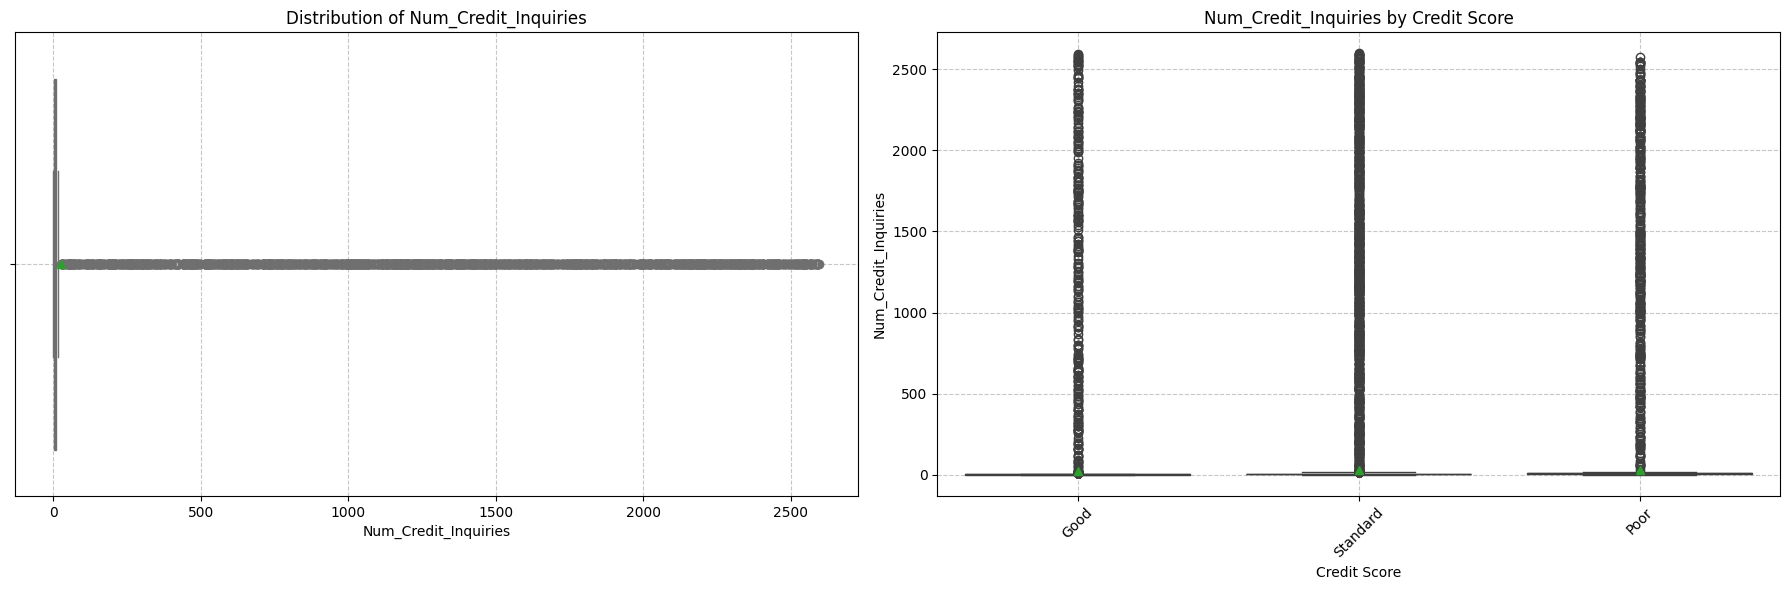

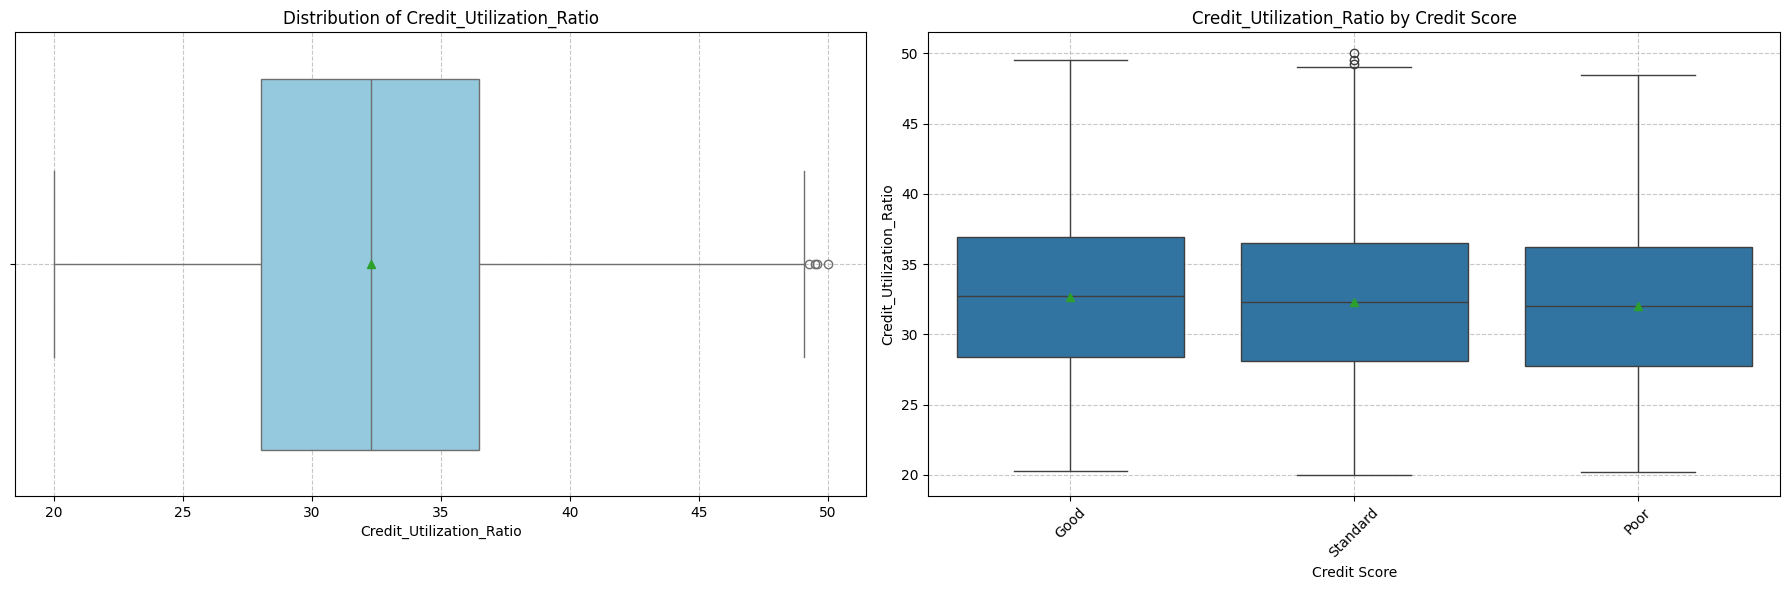

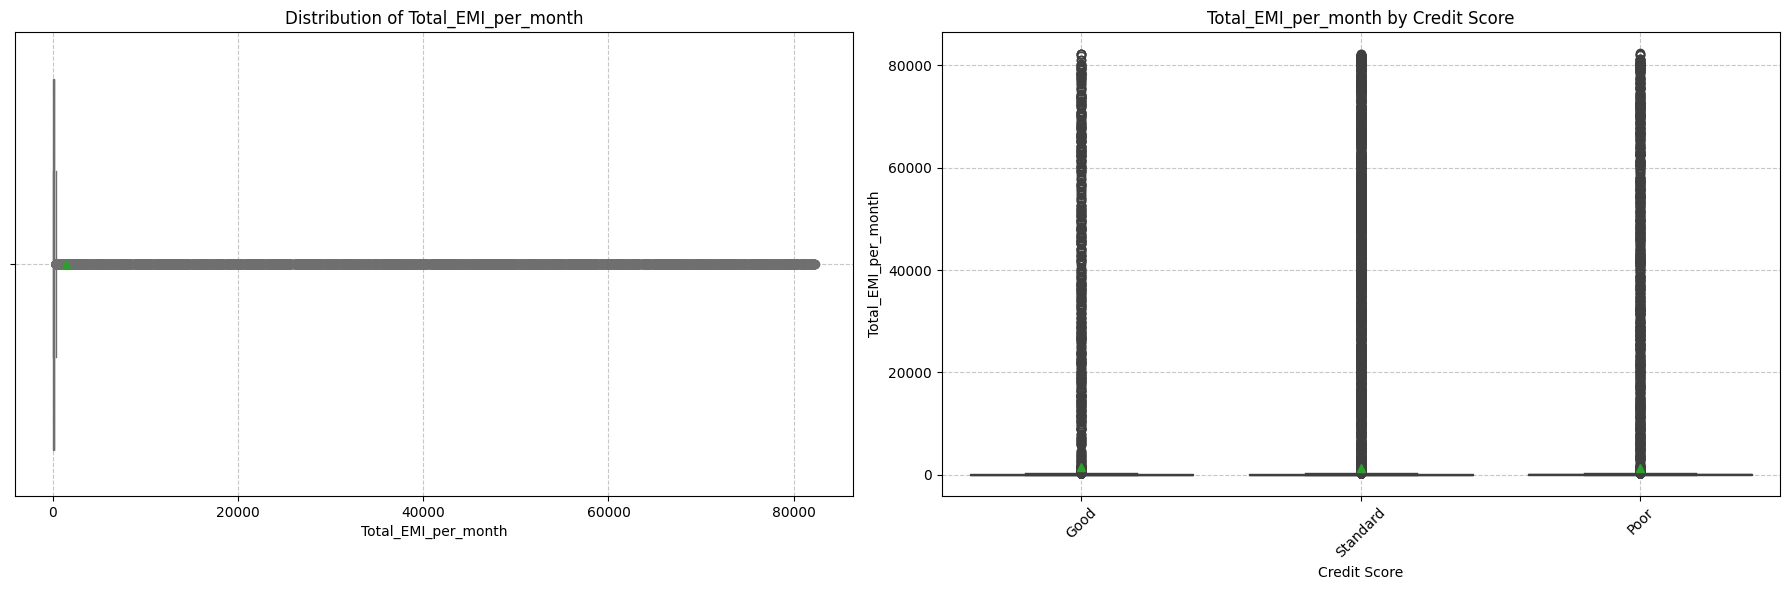

In [15]:
# Plots the distribution and Credit Score relationship for each numeric column in the train dataset.
for col in train.select_dtypes(include=np.number):
    plt.figure(figsize=(18, 6))
    
    # First subplot: Distribution of the individual feature
    plt.subplot(1, 2, 1)
    sns.boxplot(x=col, data=train, color="skyblue", showmeans=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.grid(True, linestyle='--', alpha=0.7)

    # Second subplot: Credit Score vs. Feature
    plt.subplot(1, 2, 2)
    sns.boxplot(x='Credit_Score', y=col, data=train, showmeans=True)
    plt.title(f'{col} by Credit Score')
    plt.xlabel('Credit Score')
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()


In [16]:
# Converts the 'Credit_Score' categorical column to numeric values for model compatibility.
columns=[
      'Credit_Score']
for item in columns:
    train[item] = LabelEncoder().fit_transform(train[item])
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,0
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,0
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,0
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,0
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,0


In [17]:
train['Credit_Score'].value_counts()

Credit_Score
2    53174
1    28998
0    17828
Name: count, dtype: int64

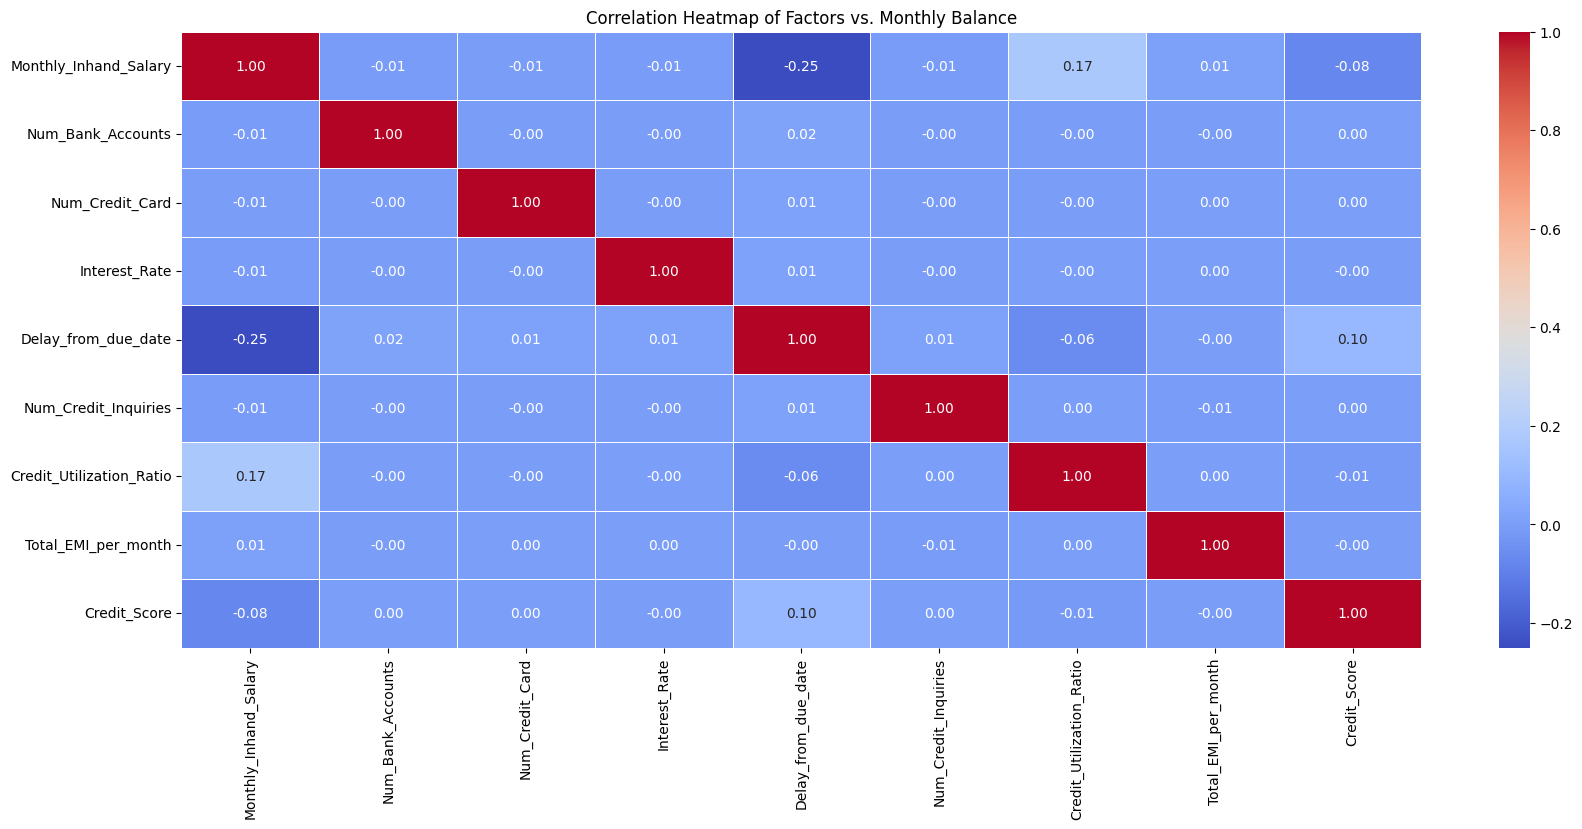

In [18]:
# Generates a correlation heatmap for numeric features in the train dataset.
selected_columns = train.select_dtypes(include=['number'])

correlation_matrix = selected_columns.corr()

plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Factors vs. Monthly Balance')
plt.show()

In [19]:
# Encodes specified categorical columns using LeaveOneOut encoding based on the 'Credit_Score' target.
columns = ['Payment_of_Min_Amount','Payment_Behaviour','Name','Occupation','Credit_Mix']

for item in columns:
    train[item] = ce.LeaveOneOutEncoder().fit_transform(train[item],train['Credit_Score'])
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,0.0,23,821-00-0265,1.337409,19114.12,1824.843333,3,...,1.350748,809.98,26.822620,22 Years and 1 Months,1.099647,49.574949,80.41529543900253,1.354970,312.49408867943663,0
1,0x1603,CUS_0xd40,February,0.0,23,821-00-0265,1.337409,19114.12,NaN,3,...,0.865508,809.98,31.944960,NaN,1.099647,49.574949,118.28022162236736,1.358308,284.62916249607184,0
2,0x1604,CUS_0xd40,March,0.0,-500,821-00-0265,1.337409,19114.12,NaN,3,...,0.865508,809.98,28.609352,22 Years and 3 Months,1.099647,49.574949,81.699521264648,1.338167,331.2098628537912,0
3,0x1605,CUS_0xd40,April,0.0,23,821-00-0265,1.337409,19114.12,NaN,3,...,0.865508,809.98,31.377862,22 Years and 4 Months,1.099647,49.574949,199.4580743910713,1.385818,223.45130972736786,0
4,0x1606,CUS_0xd40,May,0.0,23,821-00-0265,1.337409,19114.12,1824.843333,3,...,0.865508,809.98,24.797347,22 Years and 5 Months,1.099647,49.574949,41.420153086217326,1.345174,341.48923103222177,0


In [20]:
train[['Payment_of_Min_Amount','Payment_Behaviour','Name','Occupation','Credit_Mix']]

,Payment_of_Min_Amount,Payment_Behaviour,Name,Occupation,Credit_Mix
0,1.099647,1.354970,0.000000,1.337409,1.350748
1,1.099647,1.358308,0.000000,1.337409,0.865508
2,1.099647,1.338167,0.000000,1.337409,0.865508
3,1.099647,1.385818,0.000000,1.337409,0.865508
4,1.099647,1.345174,0.000000,1.337409,0.865508
...,...,...,...,...,...
99995,1.099619,1.320554,1.285714,1.373132,1.350698
99996,1.099619,1.345117,1.285714,1.373132,1.350698
99997,1.099619,1.320554,1.285714,1.373132,0.865467
99998,1.099591,1.358116,1.142857,1.372973,0.865426


In [21]:
train.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                        float64
Age                          object
SSN                          object
Occupation                  float64
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                  float64
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount       float64
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour           float64
Monthly_Balance              object
Credit_Score                

In [22]:
# This applies mean encoding to the specified columns, replacing values with the average 'Credit_Score' for each category.
columns2 =['Annual_Income','Age','Num_Credit_Card','Interest_Rate','Delay_from_due_date','Num_of_Delayed_Payment','Monthly_Balance',
                           'Num_Credit_Inquiries','Changed_Credit_Limit','Credit_History_Age',
                           'Outstanding_Debt','Total_EMI_per_month']
for item in columns2:
    mean_encoding = train.groupby([item])['Credit_Score'].mean()
    train[item] = train[item].map(mean_encoding)
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,0.0,1.383130,821-00-0265,1.337409,0.25,1824.843333,3,...,1.350748,0.25,26.822620,1.284314,1.099647,0.25,80.41529543900253,1.354970,0.0,0
1,0x1603,CUS_0xd40,February,0.0,1.383130,821-00-0265,1.337409,0.25,NaN,3,...,0.865508,0.25,31.944960,NaN,1.099647,0.25,118.28022162236736,1.358308,0.0,0
2,0x1604,CUS_0xd40,March,0.0,1.319413,821-00-0265,1.337409,0.25,NaN,3,...,0.865508,0.25,28.609352,1.219008,1.099647,0.25,81.699521264648,1.338167,0.0,0
3,0x1605,CUS_0xd40,April,0.0,1.383130,821-00-0265,1.337409,0.25,NaN,3,...,0.865508,0.25,31.377862,1.243902,1.099647,0.25,199.4580743910713,1.385818,0.0,0
4,0x1606,CUS_0xd40,May,0.0,1.383130,821-00-0265,1.337409,0.25,1824.843333,3,...,0.865508,0.25,24.797347,1.212245,1.099647,0.25,41.420153086217326,1.345174,0.0,0


In [23]:
# Drops specified columns from the train dataset that are not needed for analysis.
columns_to_drop = ['ID', 'Customer_ID', 'Month', 'SSN', 'Amount_invested_monthly', 'Type_of_Loan']
train.drop(columns=columns_to_drop, inplace=True)

remaining_columns = train.columns.tolist()

print("Removed Columns:")
print("\n".join(textwrap.wrap(", ".join(columns_to_drop), width=70)))

print("\nRemaining Columns:")
print("\n".join(textwrap.wrap(", ".join(remaining_columns), width=70)))


Removed Columns:
ID, Customer_ID, Month, SSN, Amount_invested_monthly, Type_of_Loan

Remaining Columns:
Name, Age, Occupation, Annual_Income, Monthly_Inhand_Salary,
Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Num_of_Loan,
Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit,
Num_Credit_Inquiries, Credit_Mix, Outstanding_Debt,
Credit_Utilization_Ratio, Credit_History_Age, Payment_of_Min_Amount,
Total_EMI_per_month, Payment_Behaviour, Monthly_Balance, Credit_Score


## Preparing the Data

In [24]:
X=train.drop('Credit_Score',axis=1)
y = train.Credit_Score

In [25]:
# Drops specified columns from the train dataset and separates features (X) from the target variable (y).
columns3 =['Name','Annual_Income','Num_of_Loan', 'Outstanding_Debt']

for item in columns3:
    train.drop(item,axis=1,inplace=True)
X=train.drop('Credit_Score',axis=1)
y = train.Credit_Score

In [26]:
wrapped_columns = textwrap.fill(", ".join(X.columns), width=100)
print("\nColumns:")
print(wrapped_columns)



Columns:
Age, Occupation, Monthly_Inhand_Salary, Num_Bank_Accounts, Num_Credit_Card, Interest_Rate,
Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit, Num_Credit_Inquiries, Credit_Mix,
Credit_Utilization_Ratio, Credit_History_Age, Payment_of_Min_Amount, Total_EMI_per_month,
Payment_Behaviour, Monthly_Balance


In [27]:
train.isnull().sum()

Age                             0
Occupation                      0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

## Data Splitting

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state = 42)

In [29]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

## K-NearestNeighbors Classifier

In [30]:
# Train KNeighbors Classifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_imputed, y_train)

knn_train_predictions = knn_model.predict(X_train_imputed)
knn_test_predictions = knn_model.predict(X_test_imputed)

knn_train_accuracy = accuracy_score(knn_train_predictions, y_train)
knn_test_accuracy = accuracy_score(knn_test_predictions, y_test)

knn_precision = precision_score(y_test, knn_test_predictions, average='weighted')
knn_recall = recall_score(y_test, knn_test_predictions, average='weighted')
knn_f1 = f1_score(y_test, knn_test_predictions, average='weighted')

print("KNeighborsClassifier Training Accuracy:", knn_train_accuracy)
print("KNeighborsClassifier Test Accuracy:", knn_test_accuracy)
print("KNeighborsClassifier Precision:", knn_precision)
print("KNeighborsClassifier Recall:", knn_recall)
print("KNeighborsClassifier F1-Score:", knn_f1)

KNeighborsClassifier Training Accuracy: 0.8344428571428572
KNeighborsClassifier Test Accuracy: 0.7221
KNeighborsClassifier Precision: 0.7206377377309924
KNeighborsClassifier Recall: 0.7221
KNeighborsClassifier F1-Score: 0.720770695444018


KNeighborsClassifier Confusion Matrix:
[[ 3347   744  1231]
 [  540  5634  2631]
 [  839  2352 12682]]


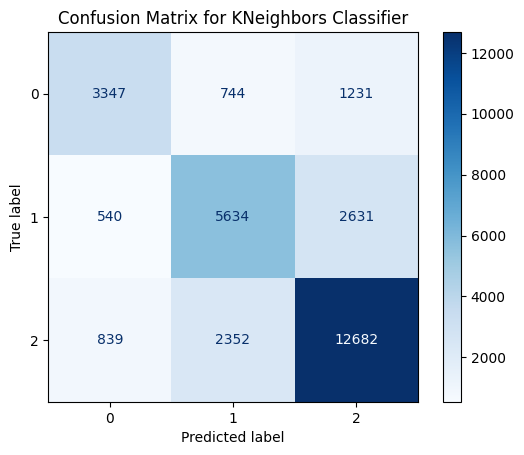

In [31]:
knn_cm = confusion_matrix(y_test, knn_test_predictions)
print("KNeighborsClassifier Confusion Matrix:")
print(knn_cm)

# Display the confusion matrix for KNeighborsClassifier
knn_disp = ConfusionMatrixDisplay(confusion_matrix=knn_cm, display_labels=knn_model.classes_)
knn_disp.plot(cmap='Blues')
plt.title('Confusion Matrix for KNeighbors Classifier')
plt.show()

## Simple Linear Regression

In [32]:
# Train Simple Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_imputed, y_train)

lr_train_predictions = lr_model.predict(X_train_imputed)
lr_test_predictions = lr_model.predict(X_test_imputed)

# Convert predictions to integer values for classification
lr_train_predictions = np.round(lr_train_predictions).astype(int)
lr_test_predictions = np.round(lr_test_predictions).astype(int)

lr_train_accuracy = accuracy_score(lr_train_predictions, y_train)
lr_test_accuracy = accuracy_score(lr_test_predictions, y_test)

lr_precision = precision_score(y_test, lr_test_predictions, average='weighted')
lr_recall = recall_score(y_test, lr_test_predictions, average='weighted')
lr_f1 = f1_score(y_test, lr_test_predictions, average='weighted')

print("LinearRegression Training Accuracy:", lr_train_accuracy)
print("LinearRegression Test Accuracy:", lr_test_accuracy)
print("LinearRegression Precision:", lr_precision)
print("LinearRegression Recall:", lr_recall)
print("LinearRegression F1-Score:", lr_f1)

LinearRegression Training Accuracy: 0.9915142857142857
LinearRegression Test Accuracy: 0.9913
LinearRegression Precision: 0.9915504632693579
LinearRegression Recall: 0.9913
LinearRegression F1-Score: 0.9913363900574992


Simple Linear Regression Confusion Matrix:
[[ 5247    75     0]
 [    0  8805     0]
 [    0   186 15687]]


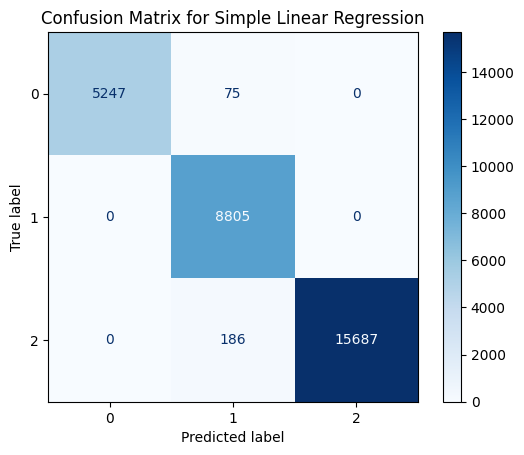

In [33]:
lr_cm = confusion_matrix(y_test, lr_test_predictions)
print("Simple Linear Regression Confusion Matrix:")
print(lr_cm)

# Display the confusion matrix for LinearRegression
lr_disp = ConfusionMatrixDisplay(confusion_matrix=lr_cm, display_labels=np.unique(y_test))
lr_disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Simple Linear Regression')
plt.show()

## Multiple Linear Regression

In [34]:
# Train Multiple Linear Regression model
mlr_model = LinearRegression()
mlr_model.fit(X_train_imputed, y_train)

mlr_train_predictions = mlr_model.predict(X_train_imputed)
mlr_test_predictions = mlr_model.predict(X_test_imputed)

# Convert predictions to integer values for classification
mlr_train_predictions = np.round(mlr_train_predictions).astype(int)
mlr_test_predictions = np.round(mlr_test_predictions).astype(int)

mlr_train_accuracy = accuracy_score(mlr_train_predictions, y_train)
mlr_test_accuracy = accuracy_score(mlr_test_predictions, y_test)

mlr_precision = precision_score(y_test, mlr_test_predictions, average='weighted')
mlr_recall = recall_score(y_test, mlr_test_predictions, average='weighted')
mlr_f1 = f1_score(y_test, mlr_test_predictions, average='weighted')

print("Multiple Linear Regression Training Accuracy:", mlr_train_accuracy)
print("Multiple Linear Regression Test Accuracy:", mlr_test_accuracy)
print("Multiple Linear Regression Precision:", mlr_precision)
print("Multiple Linear Regression Recall:", mlr_recall)
print("Multiple Linear Regression F1-Score:", mlr_f1)

Multiple Linear Regression Training Accuracy: 0.9915142857142857
Multiple Linear Regression Test Accuracy: 0.9913
Multiple Linear Regression Precision: 0.9915504632693579
Multiple Linear Regression Recall: 0.9913
Multiple Linear Regression F1-Score: 0.9913363900574992


Multiple Linear Regression Confusion Matrix:
[[ 5247    75     0]
 [    0  8805     0]
 [    0   186 15687]]


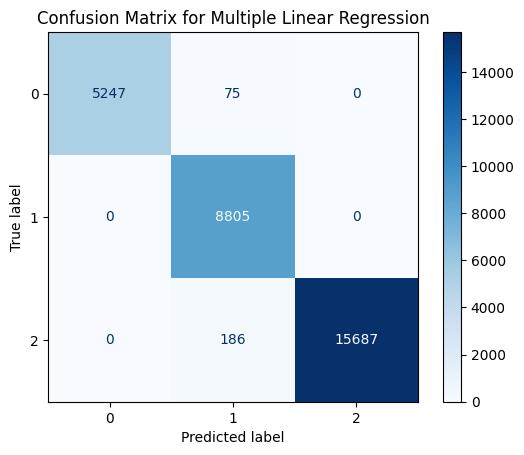

In [35]:
mlr_cm = confusion_matrix(y_test, mlr_test_predictions)
print("Multiple Linear Regression Confusion Matrix:")
print(mlr_cm)

# Display the confusion matrix for Multiple Linear Regression
mlr_disp = ConfusionMatrixDisplay(confusion_matrix=mlr_cm, display_labels=np.unique(y_test))
mlr_disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Multiple Linear Regression')
plt.show()

## Logistic Regression

In [36]:

# Train Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train_imputed, y_train)

log_reg_train_predictions = log_reg_model.predict(X_train_imputed)
log_reg_test_predictions = log_reg_model.predict(X_test_imputed)

log_reg_train_accuracy = accuracy_score(log_reg_train_predictions, y_train)
log_reg_test_accuracy = accuracy_score(log_reg_test_predictions, y_test)

log_reg_precision = precision_score(y_test, log_reg_test_predictions, average='weighted')
log_reg_recall = recall_score(y_test, log_reg_test_predictions, average='weighted')
log_reg_f1 = f1_score(y_test, log_reg_test_predictions, average='weighted')

print("Logistic Regression Training Accuracy:", log_reg_train_accuracy)
print("Logistic Regression Test Accuracy:", log_reg_test_accuracy)
print("Logistic Regression Precision:", log_reg_precision)
print("Logistic Regression Recall:", log_reg_recall)
print("Logistic Regression F1-Score:", log_reg_f1)

Logistic Regression Training Accuracy: 0.9953285714285715
Logistic Regression Test Accuracy: 0.9951666666666666
Logistic Regression Precision: 0.9952026703671987
Logistic Regression Recall: 0.9951666666666666
Logistic Regression F1-Score: 0.9951679926145617


Logistic Regression Confusion Matrix:
[[ 5247    54    21]
 [    7  8792     6]
 [    0    57 15816]]


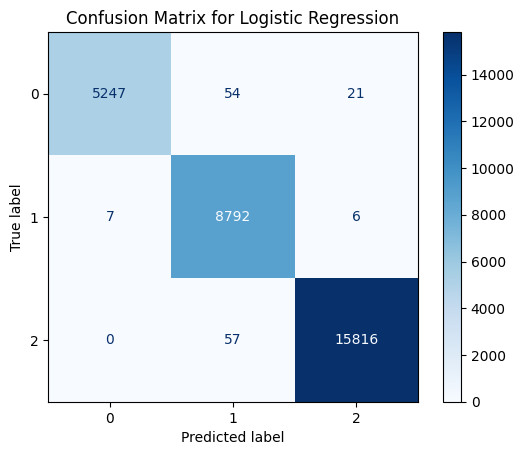

In [37]:
log_reg_cm = confusion_matrix(y_test, log_reg_test_predictions)
print("Logistic Regression Confusion Matrix:")
print(log_reg_cm)

# Display the confusion matrix for Logistic Regression
log_reg_disp = ConfusionMatrixDisplay(confusion_matrix=log_reg_cm, display_labels=log_reg_model.classes_)
log_reg_disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

## Naive Bayes

In [38]:
# Train Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_imputed, y_train)

nb_train_predictions = nb_model.predict(X_train_imputed)
nb_test_predictions = nb_model.predict(X_test_imputed)

nb_train_accuracy = accuracy_score(nb_train_predictions, y_train)
nb_test_accuracy = accuracy_score(nb_test_predictions, y_test)

nb_precision = precision_score(y_test, nb_test_predictions, average='weighted')
nb_recall = recall_score(y_test, nb_test_predictions, average='weighted')
nb_f1 = f1_score(y_test, nb_test_predictions, average='weighted')

print("Naive Bayes Training Accuracy:", nb_train_accuracy)
print("Naive Bayes Test Accuracy:", nb_test_accuracy)
print("Naive Bayes Precision:", nb_precision)
print("Naive Bayes Recall:", nb_recall)
print("Naive Bayes F1-Score:", nb_f1)

Naive Bayes Training Accuracy: 0.9917714285714285
Naive Bayes Test Accuracy: 0.9912666666666666
Naive Bayes Precision: 0.9914646271198239
Naive Bayes Recall: 0.9912666666666666
Naive Bayes F1-Score: 0.9912981808558816


Naive Bayes Confusion Matrix:
[[ 5258    63     1]
 [   16  8789     0]
 [    2   180 15691]]


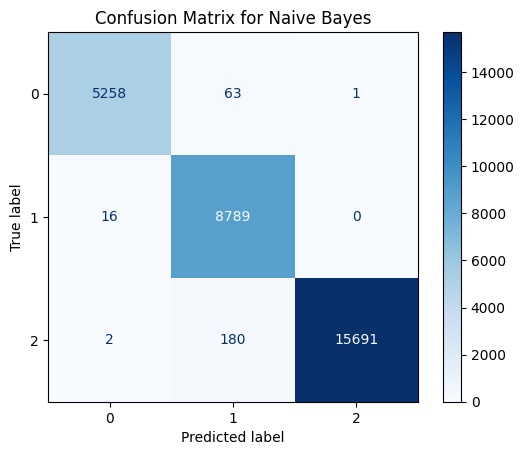

In [39]:
nb_cm = confusion_matrix(y_test, nb_test_predictions)
print("Naive Bayes Confusion Matrix:")
print(nb_cm)

# Display the confusion matrix for Naive Bayes
nb_disp = ConfusionMatrixDisplay(confusion_matrix=nb_cm, display_labels=nb_model.classes_)
nb_disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()

## Support Vector Machine

In [40]:
# Train Support Vector Machine model
svm_model = SVC()
svm_model.fit(X_train_imputed, y_train)

svm_train_predictions = svm_model.predict(X_train_imputed)
svm_test_predictions = svm_model.predict(X_test_imputed)

svm_train_accuracy = accuracy_score(svm_train_predictions, y_train)
svm_test_accuracy = accuracy_score(svm_test_predictions, y_test)

svm_precision = precision_score(y_test, svm_test_predictions, average='weighted')
svm_recall = recall_score(y_test, svm_test_predictions, average='weighted')
svm_f1 = f1_score(y_test, svm_test_predictions, average='weighted')

print("Support Vector Machine Training Accuracy:", svm_train_accuracy)
print("Support Vector Machine Test Accuracy:", svm_test_accuracy)
print("Support Vector Machine Precision:", svm_precision)
print("Support Vector Machine Recall:", svm_recall)
print("Support Vector Machine F1-Score:", svm_f1)

Support Vector Machine Training Accuracy: 0.5328714285714286
Support Vector Machine Test Accuracy: 0.5291
Support Vector Machine Precision: 0.27994681
Support Vector Machine Recall: 0.5291
Support Vector Machine F1-Score: 0.3661589300895952


Support Vector Machine Confusion Matrix:
[[    0     0  5322]
 [    0     0  8805]
 [    0     0 15873]]


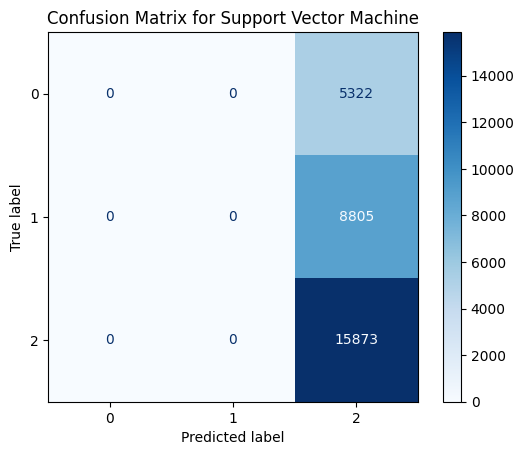

In [41]:
svm_cm = confusion_matrix(y_test, svm_test_predictions)
print("Support Vector Machine Confusion Matrix:")
print(svm_cm)

# Display the confusion matrix for Support Vector Machine
svm_disp = ConfusionMatrixDisplay(confusion_matrix=svm_cm, display_labels=svm_model.classes_)
svm_disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Support Vector Machine')
plt.show()

## Decision Tree Classifier

In [42]:
# Train Decision Tree Classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_imputed, y_train)

dt_train_predictions = dt_model.predict(X_train_imputed)
dt_test_predictions = dt_model.predict(X_test_imputed)

dt_train_accuracy = accuracy_score(dt_train_predictions, y_train)
dt_test_accuracy = accuracy_score(dt_test_predictions, y_test)

dt_precision = precision_score(y_test, dt_test_predictions, average='weighted')
dt_recall = recall_score(y_test, dt_test_predictions, average='weighted')
dt_f1 = f1_score(y_test, dt_test_predictions, average='weighted')

print("DecisionTreeClassifier Training Accuracy:", dt_train_accuracy)
print("DecisionTreeClassifier Test Accuracy:", dt_test_accuracy)
print("DecisionTreeClassifier Precision:", dt_precision)
print("DecisionTreeClassifier Recall:", dt_recall)
print("DecisionTreeClassifier F1-Score:", dt_f1)

DecisionTreeClassifier Training Accuracy: 1.0
DecisionTreeClassifier Test Accuracy: 0.9999
DecisionTreeClassifier Precision: 0.9999000125242657
DecisionTreeClassifier Recall: 0.9999
DecisionTreeClassifier F1-Score: 0.999900004172024


DecisionTreeClassifier Confusion Matrix:
[[ 5321     1     0]
 [    1  8804     0]
 [    1     0 15872]]


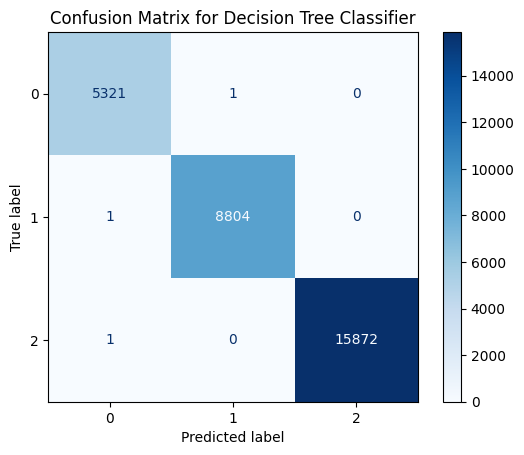

In [43]:
dt_cm = confusion_matrix(y_test, dt_test_predictions)
print("DecisionTreeClassifier Confusion Matrix:")
print(dt_cm)

# Display the confusion matrix for DecisionTreeClassifier
dt_disp = ConfusionMatrixDisplay(confusion_matrix=dt_cm, display_labels=dt_model.classes_)
dt_disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

## Random Forest

In [44]:
# Train Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train_imputed, y_train)

rf_train_predictions = rf_model.predict(X_train_imputed)
rf_test_predictions = rf_model.predict(X_test_imputed)

rf_train_accuracy = accuracy_score(rf_train_predictions, y_train)
rf_test_accuracy = accuracy_score(rf_test_predictions, y_test)

rf_precision = precision_score(y_test, rf_test_predictions, average='weighted')
rf_recall = recall_score(y_test, rf_test_predictions, average='weighted')
rf_f1 = f1_score(y_test, rf_test_predictions, average='weighted')

print("RandomForestClassifier Training Accuracy:", rf_train_accuracy)
print("RandomForestClassifier Test Accuracy:", rf_test_accuracy)
print("RandomForestClassifier Precision:", rf_precision)
print("RandomForestClassifier Recall:", rf_recall)
print("RandomForestClassifier F1-Score:", rf_f1)

RandomForestClassifier Training Accuracy: 1.0
RandomForestClassifier Test Accuracy: 0.9999
RandomForestClassifier Precision: 0.9999000188964475
RandomForestClassifier Recall: 0.9999
RandomForestClassifier F1-Score: 0.9998999975135858


RandomForestClassifier Confusion Matrix:
[[ 5320     0     2]
 [    0  8804     1]
 [    0     0 15873]]


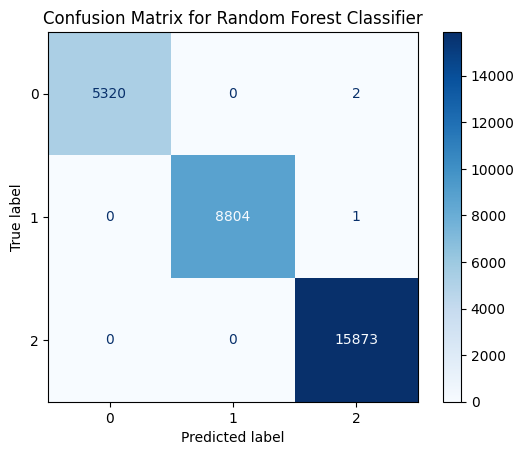

In [45]:
rf_cm = confusion_matrix(y_test, rf_test_predictions)
print("RandomForestClassifier Confusion Matrix:")
print(rf_cm)

# Display the confusion matrix for RandomForestClassifier
rf_disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=rf_model.classes_)
rf_disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

## Comparison between Classifier Models

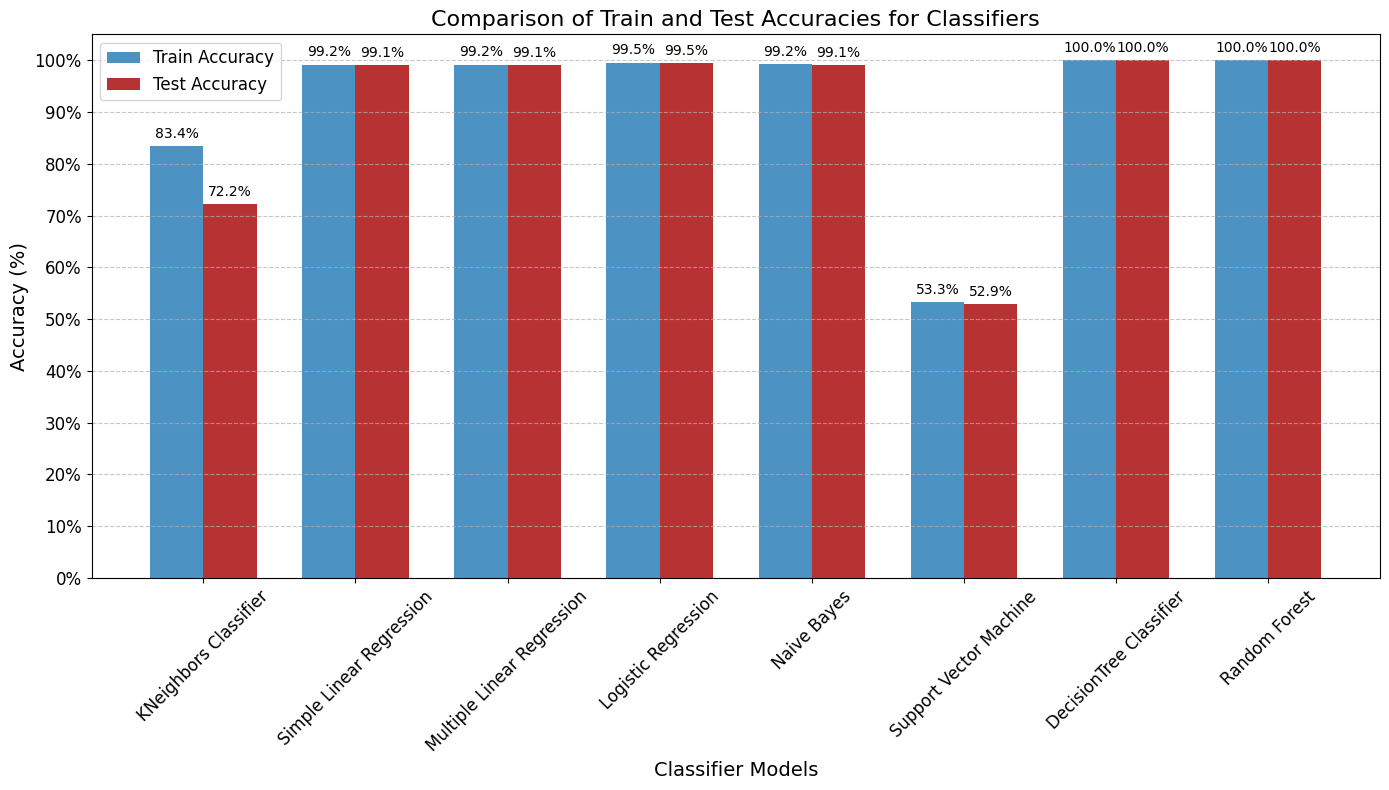

In [46]:
classifiers = [
    'KNeighbors Classifier', 
    'Simple Linear Regression', 
    'Multiple Linear Regression', 
    'Logistic Regression', 
    'Naive Bayes', 
    'Support Vector Machine',
    'DecisionTree Classifier', 
    'Random Forest'
]

train_accuracies = [
    knn_train_accuracy,  
    lr_train_accuracy, 
    mlr_train_accuracy, 
    log_reg_train_accuracy, 
    nb_train_accuracy, 
    svm_train_accuracy,
    dt_train_accuracy,
    rf_train_accuracy
]

test_accuracies = [
    knn_test_accuracy,  
    lr_test_accuracy, 
    mlr_test_accuracy, 
    log_reg_test_accuracy, 
    nb_test_accuracy, 
    svm_test_accuracy, 
    dt_test_accuracy,
    rf_test_accuracy
]

# Convert accuracies to percentages for better readability
train_accuracies_percent = [acc * 100 for acc in train_accuracies]
test_accuracies_percent = [acc * 100 for acc in test_accuracies]

# Set up bar width and positions
bar_width = 0.35
x = np.arange(len(classifiers))

# Create a bar chart
plt.figure(figsize=(14, 8))

# Plot bars for train and test accuracies
bars1 = plt.bar(x - bar_width/2, train_accuracies_percent, width=bar_width, label='Train Accuracy', color='#1f77b4', alpha=0.8)
bars2 = plt.bar(x + bar_width/2, test_accuracies_percent, width=bar_width, label='Test Accuracy', color='#A50000', alpha=0.8)

# Add labels, title, and legend
plt.xlabel('Classifier Models', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.title('Comparison of Train and Test Accuracies for Classifiers', fontsize=16)
plt.xticks(x, classifiers, fontsize=12, rotation=45)
plt.legend(fontsize=12)

# Add y-axis percentage ticks
plt.yticks(np.arange(0, 110, 10), [f"{i}%" for i in range(0, 110, 10)], fontsize=12)

# Add data labels on top of the bars
for bar in bars1 + bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f"{yval:.1f}%", ha='center', va='bottom', fontsize=10)

# Display grid and show plot with adjusted layout
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [47]:
print("Checking for missing values in features:")
print(X.isnull().sum())

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Optionally convert back to DataFrame
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)

# Verify if there are still missing values
print("Checking for missing values after imputation:")
print(X_imputed.isnull().sum())

models = {
    'KNeighbors Classifier': KNeighborsClassifier(),
    'Simple Linear Regression': LinearRegression(),
    'Multiple Linear Regression': LinearRegression(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

cv_results = {}
for model_name, model in models.items():
    scores = cross_val_score(model, X_imputed, y, cv=5, scoring='accuracy')
    cv_results[model_name] = scores
    print(f"{model_name} Cross-Validation Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

cv_results


Checking for missing values in features:
Age                             0
Occupation                      0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Payment_Behaviour               0
Monthly_Balance              1200
dtype: int64
Checking for missing values after imputation:
Age                         0
Occupation                  0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix            

{'KNeighbors Classifier': array([0.6275 , 0.6242 , 0.6286 , 0.6193 , 0.63305]),
 'Simple Linear Regression': array([nan, nan, nan, nan, nan]),
 'Multiple Linear Regression': array([nan, nan, nan, nan, nan]),
 'Logistic Regression': array([0.99515, 0.99435, 0.99545, 0.99545, 0.9956 ]),
 'Naive Bayes': array([0.9919 , 0.9916 , 0.99145, 0.9917 , 0.99115]),
 'Support Vector Machine': array([0.5312 , 0.53175, 0.53255, 0.53085, 0.5316 ]),
 'Decision Tree Classifier': array([0.99995, 0.9996 , 1.     , 0.99965, 0.9999 ]),
 'Random Forest': array([0.99995, 0.99995, 0.99995, 0.9998 , 0.99985])}